In [1]:
import csv
import pandas as pd
import re
import sys
csv.field_size_limit(sys.maxsize)
from bs4 import BeautifulSoup
from html.parser import HTMLParser
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('/home/eduardo/Desktop/rhs/comentarios.csv', 'r', encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=';')
    rows = list(reader)

In [3]:
coments = pd.DataFrame.from_records(rows)

In [4]:
df_treatment = coments['Comentario'].tolist()

In [5]:
# Limpa erros de códificação das postagens (uma vez que tem erros de ASCII não reconhece caracteres como "ç")
df_html =[]
for item in df_treatment:
    parser = HTMLParser()
    df_html.append(parser.unescape(item))

/home/eduardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  """


In [6]:
coments['Comentario'] =  df_html

In [7]:
# usa o beautifulsoup para limpar todo o html das postagens
def cleanMe(html):
    soup = BeautifulSoup(html, "lxml") # cria um novo objeto do bs4 para o item html
    for script in soup(["script", "style"]): # remove todos scripts e css
        script.extract()
    # get text
    text = soup.get_text()
    # quebrar em linhas e remove espaço à esquerda e à direita em cada
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # remove linhas em branco
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text

In [8]:
# Gera uma lista que armazena o texto tratado pela função feita acima
df_soup = []
for text in coments.get('Comentario'):
       df_soup.append(cleanMe(text))

/home/eduardo/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/eduardo/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/eduardo/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/eduardo/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/eduardo/anaconda3/lib/python3.6/site-p

In [9]:
coments['Comentario'] =  df_soup

In [10]:
#clean pontuation and signs from text/ put text in lowercase
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[\,\$\&\*\%\(\)\~\-\"\;\^\+\#\/|0-9]", " ") # add se quiser \'\.\?\!
    df[text_field] = df[text_field].str.replace(r"[\.\=\'\:\;\?\!\_\...\n\xa0]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [11]:
coments['Comentario'].head(5)

0       Viramundo, vira o mundo, virá ao mundo... veio
1    Perfeitamente, Dário, a Rede HumanizaSUS é nos...
2                                                     
3    É uma honra fazer parte desse time acolhedor, ...
4    O que nos chamou atenção foi a sua sinalização...
Name: Comentario, dtype: object

In [12]:
standardize_text(coments, 'Comentario')

,Data,Tipo,Assunto,Autor,Pagina,Comentario
0,2008-02-23 13:10:25,blog,Viramundo,Dario Frederico Pasche,Café HumanizaSUS,viramundo vira o mundo virá ao mundo veio
1,2008-02-23 13:16:30,blog,Rede aberta,Eduardo Passos,Vida longa e potente à Rede HumanizaSUS,perfeitamente dário a rede humanizasus é nos...
2,2008-02-23 13:17:33,blog,(Sem título),Eduardo Passos,Vida longa e potente à Rede HumanizaSUS,
3,2008-02-23 13:59:53,blog,pontapé inicial,,Coletivo Nacional da PNH se reúne em Brasília,é uma honra fazer parte desse time acolhedor ...
4,2008-02-23 14:22:55,blog,coletivo nacional - processos de trabalho,Maria Esther de Albuquerque Vilela,Coletivo Nacional - Processos de trabalho em a...,o que nos chamou atenção foi a sua sinalização...
5,2008-02-23 17:05:23,blog,teste,,Encontro Nacional - Primeiro dia - Vera Figuei...,teste
6,2008-02-23 19:16:21,blog,Sobre seu post,bethmori,Vida longa e potente à Rede HumanizaSUS,dariopenso que se trata sim de uma aposta na e...
7,2008-02-23 21:36:39,blog,Exelente matéria de,Patrícia Mafra Macedo,""" Acolhimento com Classificação de Risco""",exelente matéria de classificação dos riscos ...
8,2008-02-24 16:54:31,blog,Coletivo PNH em rede na Rede Humanizasus,Claudia Abbês,Drupal,a rede humanizasus inicia quente aquecida por...
9,2008-03-01 07:50:12,blog,Tecendo redes,Eliana Carvalho,Curso Tecendo Redes - MT - apresentação,estar num curso onde as metas se fazem ao cami...


In [13]:
coments['Comentario'][34288]

'que legal  emília  muito boa essa  iniciativa   estão todos de parabéns '

In [14]:
# Remove multiple spaces created with the text standardization
df_aux = []
for text in coments.get('Comentario'): 
    df_aux.append(re.sub(' +',' ',text))

coments['Comentario'] = df_aux

In [15]:
coments['Comentario'][34288]

'que legal emília muito boa essa iniciativa estão todos de parabéns '

In [16]:
# Remove Stop Words
pathStopwords = "/home/eduardo/Desktop/rhs/stopwords.txt"
# Read in and split the stopwords file.
with open(pathStopwords, 'r') as f:
    stop_words = f.read().split("\n")

In [17]:
dfList = coments['Comentario'].tolist()
#LIST WITH NO STOPWORDS
my_new_list = [[word for word in text.split() if word not in stop_words] for text in dfList]
my_new_list = [ ' '.join(l) for l in my_new_list]
coments['Comentario'] = my_new_list

In [18]:
coments['Comentario'].head()

0                 viramundo vira mundo virá mundo veio
1    perfeitamente dário rede humanizasus dispositi...
2                                                     
3    honra parte desse time acolhedor inquieto cria...
4    chamou atenção sinalização existem disputas de...
Name: Comentario, dtype: object

In [19]:
# Correct spelling, based on the frequency of the words in the datased 
# (it's possible to use an external dictionary with the correct words and apply over the dataset)
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = []
for text in coments.get('Comentario'):
    WORDS.extend(words(text))
    
count_words = Counter(WORDS)
#check the top 50 words used in all reviews
most_frequent_words = Counter(WORDS).most_common(50)
#number of unique words in all reviews
len(Counter(WORDS))
print(most_frequent_words)

[('saúde', 16262), ('sus', 8672), ('rede', 7153), ('trabalho', 7148), ('vida', 6378), ('abraço', 6011), ('grande', 5483), ('parabéns', 5318), ('bem', 5084), ('pessoas', 4452), ('bom', 4207), ('post', 3977), ('pnh', 3919), ('rhs', 3809), ('obrigada', 3775), ('emília', 3599), ('humanização', 3363), ('abraços', 3313), ('dia', 3311), ('forma', 3118), ('tempo', 3044), ('atenção', 2863), ('outros', 2700), ('profissionais', 2654), ('ver', 2651), ('tão', 2641), ('importante', 2546), ('olá', 2535), ('oi', 2492), ('usuários', 2462), ('iza', 2406), ('outro', 2379), ('bjs', 2366), ('coletivo', 2208), ('parte', 2179), ('espaço', 2142), ('texto', 2123), ('muitas', 2079), ('outras', 2052), ('encontro', 2025), ('processo', 1979), ('equipe', 1968), ('momento', 1965), ('gestão', 1957), ('saber', 1948), ('ações', 1938), ('pra', 1907), ('muitos', 1894), ('além', 1880), ('social', 1839)]


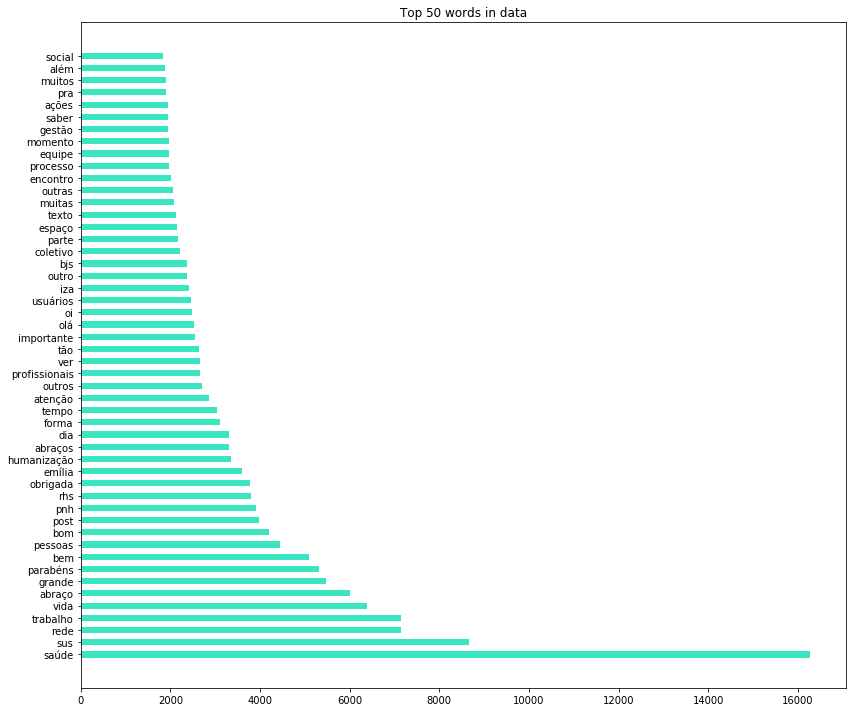

In [20]:
#PLOT TOP 20 WORDS IN TRAINING SET
fig, ax = plt.subplots(figsize=(12,10))
ax.barh( range(len(most_frequent_words)), [t[1] for t in most_frequent_words] , height = 0.5 , align="center", color='#3ce5c1')
ax.set_yticks(range(len(most_frequent_words)))
ax.set_yticklabels(t[0] for t in most_frequent_words)
plt.title('Top 50 words in data')
plt.tight_layout()
plt.show()

> Correção de palavras, essa função as vezes não funciona muito bem, por ser baseada em probabilidade, faz um calculo de probabilidade das palavras que aparecem no texto e a partir disso tenta corrigir palavras que condizem mas tem uma ou duas letras diferentes (acredito que funcione melhor em inglês)

In [21]:
# Correct Spelling functions
def P(word, N=sum(count_words.values())): 
    "Probability of `word`."
    return count_words[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in count_words)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

final_correction = [[correction(word) for word in text.split()]for text in coments['Comentario']]
final_correction = [ ' '.join(l) for l in final_correction]

coments['Comentario'] = final_correction

In [22]:
#check correction function
correction('bisualizaga')

'visualizada'

In [23]:
coments['Comentario'].head()

0                 viramundo vira mundo virá mundo veio
1    perfeitamente dário rede humanizasus dispositi...
2                                                     
3    honra parte desse time acolhedor inquieto cria...
4    chamou atenção sinalização existem disputas de...
Name: Comentario, dtype: object

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()

df['word_count'] = coments['Comentario'].apply(lambda x : len(x.split()))
df['char_count'] = coments['Comentario'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)

#manter no dataset original
coments['word_count'] = coments['Comentario'].apply(lambda x : len(x.split()))
coments['char_count'] = coments['Comentario'].apply(lambda x : len(x.replace(" ","")))
coments['word_density'] = df['word_count'] / (df['char_count'] + 1)

df[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,6,31,0.187500
1,45,291,0.154110
2,0,0,0.000000
3,24,149,0.160000
4,32,220,0.144796
5,1,5,0.166667
6,50,389,0.128205
7,12,96,0.123711
8,33,244,0.134694
9,42,300,0.139535


[Text(0,0.5,'Number of Comments'), Text(0.5,0,'Word Count')]

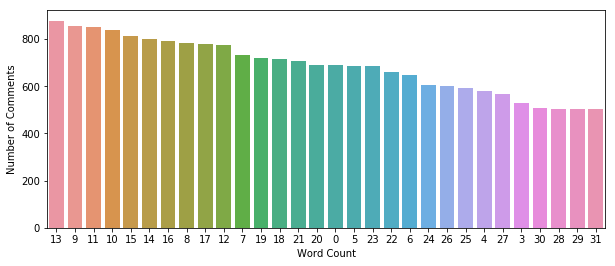

In [25]:
# number of words in the comments
plt.subplots(figsize=(10,4))
ax = sns.countplot(x="word_count", data=df, 
              order=df.word_count.value_counts().iloc[:30].index)
ax.set(xlabel='Word Count', ylabel='Number of Comments')

In [26]:
# working wiht NAN or rows withou values
import numpy as np
coments['Comentario'].replace('', np.nan, inplace=True)

In [27]:
# Drop all rows where is NaN in Comentario
coments.dropna(subset=['Comentario'], inplace=True)

In [28]:
len(coments['Comentario'][0])

36

In [29]:
#from textblob import TextBlob
#get_polarity_comment = coments['Comentario'].tolist()

In [30]:
# Polaridade com base na tradução, funciona mas tem um limite
#pola = []
#for item in get_polarity_comment:
#    phrase = TextBlob(item)
#    if len(phrase) > 3:
#        if phrase.detect_language() != 'en':
#            traducao = TextBlob(str(phrase.translate(to='en')))
#            pola.append(traducao.sentiment.polarity)
#        else:
#            pola.append(phrase.sentiment.polarity)

In [31]:
# function to obtain the sentiment of the headline using textblob package
#def get_polarity(text):
#    try:
#        pol = TextBlob(text).sentiment.polarity
#    except:
#        pol = 0.0
#    return pol

In [32]:
#coments['polarity'] = coments['Comentario'].apply(get_polarity)

> Teste inicial de polaridade com lexicon em portugês, usado para criar a nuvem de palavras de sentimentos, e basicamente dizendo o sentimento.

In [33]:
sentilexpt = open('/home/eduardo/Documents/SentiLex-PT01/SentiLex-lem-PT01.txt','r', encoding="utf-8")

dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')
    palavra = (i[:pos_ponto])
    pol_pos = int(i.find('POL'))
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade

In [ ]:
dic_palavra_polaridade

In [34]:
def score_sentiment(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = int(sum(l_sentimento))
    if score > 0:
        #return 'Positivo, Score:{}'.format(score)
        return '{}'.format(int(score))
    elif score == 0:
        #return 'Neutro, Score:{}'.format(score)
        return '{}'.format(int(score))
    else:
        #return 'Negativo, Score:{}'.format(score)
        return '{}'.format(int(score))

In [35]:
coments['polarity'] = coments['Comentario'].apply(score_sentiment)

In [36]:
coments.polarity = pd.to_numeric(coments.polarity, errors='coerce')

In [37]:
coments[['polarity']].head()

,polarity
0,2
1,3
3,3
4,0
5,0


In [38]:
sorteddf = coments.sort_values(by=['polarity'])
for value in coments['polarity']:
    if value == 1:
        posdf = sorteddf.head(1000)
    elif value == -1:
        negdf = sorteddf.tail(200)

posdf[['Comentario']].tail(10)

,Comentario
32660,ricardo intercessor provocador pensamento infl...
19970,debora incluir vc lista representantes diferen...
3255,eta rede balança roda lindo movimento espero p...
3257,vida basta lembrar post come semana país citad...
15812,obrigado roberto
8723,oi jurandir relato descrevendo festa junina ta...
24512,oi aliene benvida rede post traz tema instigan...
150,beth obrigado compartilhar conosco momentos ba...
3269,cira obrigado apoio sabemos missão difícil nun...
31337,desafios saúde brasil acredito somente partici...


In [39]:
negdf[['Comentario']].head(10)

,Comentario
1616,oi ana rita ótimo post dúvida fórum social mun...
28041,olá georgia entendo situação resultado process...
2671,lindo lindo lindo louco amor cuidado cuidador ...
8904,trabalho saúde indissociáveis estar imbricado ...
2701,comentário alegrou fato perceber alguma identi...
24457,vejo maravilha fico encantada feliz feliz obri...
4330,oi sonia mara legal lembro visto grupo rede in...
17341,pessoal produtiva emocionante tensa inquieta r...
15565,lévy pierre authier michel árvores conheciment...
33144,emoção poder conhecer parte história vida entr...


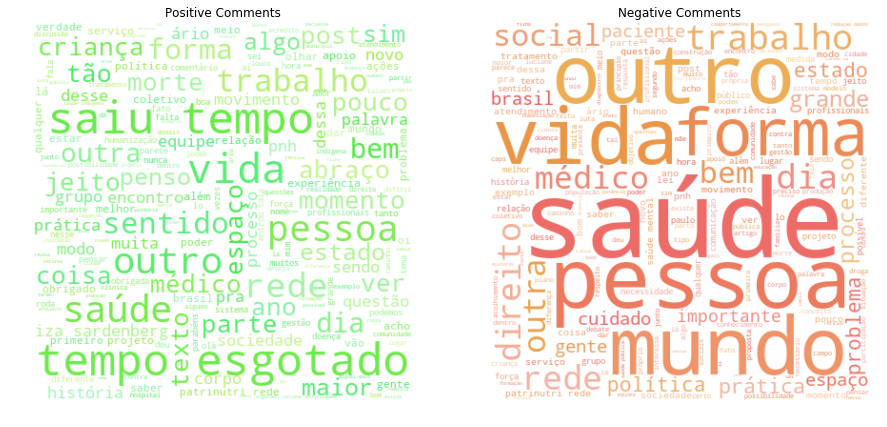

In [40]:
from wordcloud import WordCloud
import random
pos_text_cln = " ".join(posdf.Comentario)
neg_text_cln = " ".join(negdf.Comentario)

# replacing some most common words present in these texts
noise_words = ['su', 'rh', 'etc']
for noise in noise_words:
    pos_text_cln = pos_text_cln.lower().replace(noise," ")
    neg_text_cln = neg_text_cln.lower().replace(noise, " ")

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])

wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)
ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Positive Comments');

wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)
ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Negative Comments');

> O que dá para inferir das nuvens de palavra acima é que de acordo com o lexicon, existem palavras que não são negativas mas se encontram em um em sentenças que são consideradas negativas, é preciso levar em conta também, que é preciso fazer uma contagem para saber quantos itens foram setados como negativos e positivos, essa análise embora interessante é um tanto quanto subjetiva.

[Text(0,0.5,'Number of Comments'), Text(0.5,0,'polarity')]

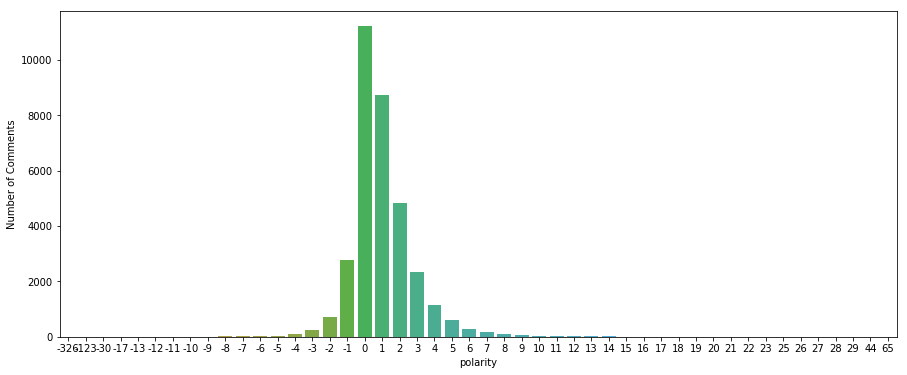

In [41]:
# number of words in the comments
plt.subplots(figsize=(15,6))
ax = sns.countplot(x="polarity", data=coments)
ax.set(xlabel='polarity', ylabel='Number of Comments')

> Com base no gráfico acima vemos que como esperado os comentários neutros são a grande maioria, e são esperados que sejam pelo simples fato de estarmos análisando uma rede controlada, não uma rede de opniões em si. (o resultado que aparece na nuvem de palavras está de acordo com esse gráfico)

## Checando interação nos comentários por ano de acordo com a quantidade de palavras utilizadas

In [42]:
#2017-05-26 16:55:02
coments['month'] = coments['Data'].apply(lambda x : str(x)[5:7])
coments['year'] = coments['Data'].apply(lambda x : str(x)[:4])
coments['date'] = coments['Data'].apply(lambda x : str(x)[8:10])
coments['hour'] = coments['Data'].apply(lambda x : str(x)[11:13])
coments['minute'] = coments['Data'].apply(lambda x : str(x)[14:16])

coments[['hour', 'month', 'date', 'year', 'minute']].tail(10)

,hour,month,date,year,minute
34279,20,05,24,2017,10
34280,20,05,24,2017,12
34281,20,05,24,2017,16
34282,00,05,25,2017,44
34283,13,05,25,2017,23
34284,13,05,26,2017,08
34285,13,05,26,2017,44
34286,14,05,26,2017,31
34287,14,05,26,2017,34
34288,16,05,26,2017,55


In [43]:
grouped_words = coments.groupby('year')[['word_count']].mean()
grouped_words_month = coments.groupby('month')[['word_count']].mean()

In [44]:
grouped_words

,word_count
year,
2008,44.167139
2009,44.461030
2010,45.179010
2011,43.293201
2012,36.979496
2013,36.141839
2014,33.270664
2015,43.506152
2016,42.044146


[Text(0,0.5,'Number of Comments'), Text(0.5,0,'Year')]

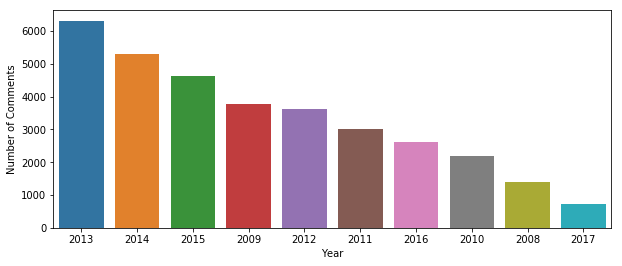

In [45]:
# number of words in the comments
plt.subplots(figsize=(10,4))
ax = sns.countplot(x="year", data=coments, 
              order=coments.year.value_counts().iloc[:30].index)
ax.set(xlabel='Year', ylabel='Number of Comments')

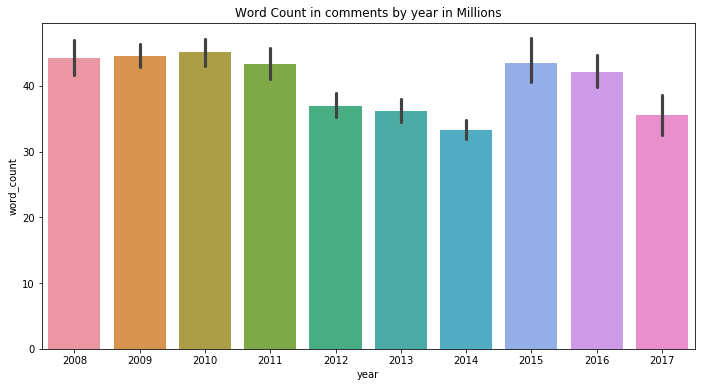

In [46]:
a4_dims = (11.7, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="whitegrid")
ax = sns.barplot("year", y="word_count", data=coments).set_title('Word Count in comments by year in Millions')

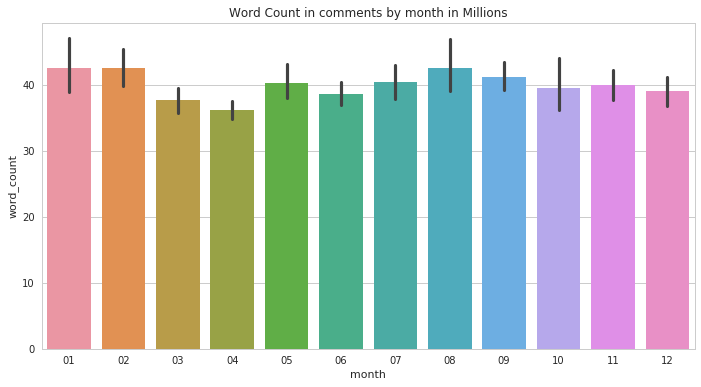

In [47]:
a4_dims = (11.7, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="whitegrid")
ax = sns.barplot("month", y="word_count", data=coments).set_title('Word Count in comments by month in Millions')

## Trabalhando com Bi-Grams / conjunto de termos encontrados mais comumente nos comentários

In [48]:
from nltk.util import ngrams
from collections import Counter
bigrams= list()
bigrams_all = list()

In [49]:
for text in coments.get('Comentario'):
    bigrams.clear()
    for word in text.split():
        bigrams.append(word)
    
    bigrams = list(ngrams(bigrams, 2))
    bigrams_all.append(tuple(bigrams))

In [50]:
BigramFreq = Counter(bigrams_all)
get_bigrams_to_list = list(BigramFreq)

In [51]:
# MOST FREQUENT BIGRAMS
get_bigrams = BigramFreq.most_common(10)

In [52]:
# bigrams and the xtimes that appeared in the data
print('Esses são os termos conjuntos que mais aparecem nos comentários da RHS, não foi possível plotar, porque em alguns casos são muitos os termos')
print('\n')
print(get_bigrams)

Esses são os termos conjuntos que mais aparecem nos comentários da RHS, não foi possível plotar, porque em alguns casos são muitos os termos


[((), 247), ((('olá', 'queridos'), ('queridos', 'vi'), ('vi', 'perfil'), ('perfil', 'algo'), ('algo', 'motivou'), ('motivou', 'comunicar'), ('comunicar', 'algo'), ('algo', 'especial'), ('especial', 'compartilhar'), ('compartilhar', 'enviar'), ('enviar', 'fotos'), ('fotos', 'contacte'), ('contacte', 'mail'), ('mail', 'favorrmurphy'), ('favorrmurphy', 'hello'), ('hello', 'dear'), ('dear', 'i'), ('i', 'saw'), ('saw', 'your'), ('your', 'profile'), ('profile', 'today'), ('today', 'and'), ('and', 'something'), ('something', 'about'), ('about', 'you'), ('you', 'motivated'), ('motivated', 'to'), ('to', 'communicate'), ('communicate', 'with'), ('with', 'you'), ('you', 'i'), ('i', 'have'), ('have', 'something'), ('something', 'special'), ('special', 'to'), ('to', 'share'), ('share', 'with'), ('with', 'you'), ('you', 'and'), ('and', 'to'), ('to', 'send'), 

In [53]:
# change the values from the lexicon to integer
newseries = dict((k,int(v)) for k,v in dic_palavra_polaridade.items())

In [54]:
##################### USING LIU APPROACH WITH SENTLEX PT
import nltk

def _show_plot(x_values, y_values, x_labels=None, y_labels=None):
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError('The plot function requires matplotlib to be installed.'
                         'See http://matplotlib.org/')

    plt.locator_params(axis='y', nbins=3)
    axes = plt.axes()
    axes.yaxis.grid()
    plt.plot(x_values, y_values, 'ro', color='red')
    plt.ylim(ymin=-1.2, ymax=1.2)
    plt.tight_layout(pad=5)
    if x_labels:
        plt.xticks(x_values, x_labels, rotation='vertical')
    if y_labels:
        plt.yticks([-1, 0, 1], y_labels, rotation='horizontal')
    # Pad margins so that markers are not clipped by the axes
    plt.margins(0.2)
    plt.show()

In [61]:
final_sentiment = []

> Demo Liu Hu Lexicon code adapted to use the PT lexicon.

In [62]:

def demo_liu_hu_lexicon(sentence, plot=False):
    """
    Basic example of sentiment classification using Liu and Hu opinion lexicon.
    This function simply counts the number of positive, negative and neutral words
    in the sentence and classifies it depending on which polarity is more represented.
    Words that do not appear in the lexicon are considered as neutral.

    :param sentence: a sentence whose polarity has to be classified.
    :param plot: if True, plot a visual representation of the sentence polarity.
    """

    from nltk.tokenize import treebank
    

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        for key, value in newseries.items():
            if word == key and value > 0:
                pos_words += 1
                y.append(1) # positive
            elif word == key and value < 0:
                neg_words += 1
                y.append(-1) # negative
            else:
                y.append(0) # neutral

    if pos_words > neg_words:
        final_sentiment.append('Positive')
        #print('Positive')
    elif pos_words < neg_words:
        final_sentiment.append('Negative')
        #print('Negative')
    elif pos_words == neg_words:
        final_sentiment.append('Neutral')
        #print('Neutral')

    if plot == True:
        _show_plot(x, y, x_labels=tokenized_sent, y_labels=['Negative', 'Neutral', 'Positive'])

In [63]:
get_sentiment = coments['Comentario'].tolist()

In [64]:
for t in get_sentiment:
    demo_liu_hu_lexicon(t)

In [65]:
len(final_sentiment)

33599

In [66]:
coments['Sentimento'] = final_sentiment

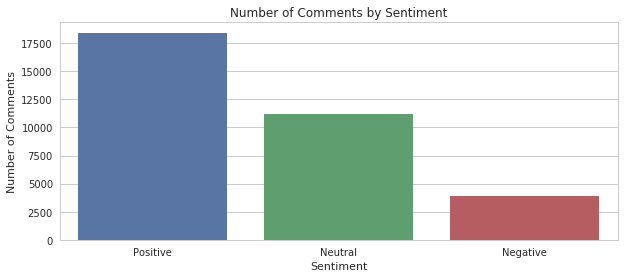

In [67]:
# number of words in the comments
plt.subplots(figsize=(10,4))
ax = sns.countplot(x="Sentimento", data=coments)
ax.set(xlabel='Sentiment', ylabel='Number of Comments')
ax.set_title('Number of Comments by Sentiment')
plt.show()

Como vemos no gráfico acima, exitem muitos mais comentários positivos do que negativos, e os neutros apresentam também, um resultado bem elevado, existem dois pontos importantes aqui.

1. O Lexicon utilizado para avaliar polaridade e sentimento parece tem alguns erros o que faz comentários que deveriam ser positivos aparecerem como negativos, todos os lexicons de sentimento em português parecem ter esse pequeno problema.

2. Existe a possibilidade de criar um Lexicon próprio para análise em questões relacionadas a saúde e com a RHS.

3. Esses dados são iniciais e crus, a partir daqui é possível criar um classificar de sentimentos para os comentários da rede.